In [1]:
f = open("covid-sequence.txt", "r")
lines = f.readlines()
genome = ''.join(''.join(lines).split())
len(genome)

29903

#### Run Length Encoding + Huffman

In [2]:
max_run = 0
genome_size = len(genome)
compressed_rle = ""
i = 0
while i < genome_size: 
    run_length = 1
    k = i+1
    while k < genome_size:
        if genome[i]==genome[k]:
            run_length += 1
            k += 1
        else:
            break
            
    if run_length>max_run:
        max_run = run_length
        
    if run_length == 1:
        compressed_rle += genome[i]
    else:
        compressed_rle += str(run_length) + genome[i]
    i = k       
len(compressed_rle)

27727

In [3]:
import re
bases = {
    'A': 0,
    'T': 0,
    'G': 0,
    'C': 0,
}
runs = {str(v):0 for v in range(2,max_run+1)}
corpus = {**bases, **runs}

compressed_rle = re.findall('[0-9]+|[ATGC]',compressed_rle)

for s in compressed_rle:
    corpus[s] += 1


# Contains frequency of each symbol 
corpus_freq = {key:corpus[key]/len(compressed_rle) for key in corpus.keys()}
corpus_freq

{'A': 0.21907235086200677,
 'T': 0.2300728558032172,
 'G': 0.17204068383466783,
 'C': 0.16605352376830412,
 '2': 0.1562071701651879,
 '3': 0.03996249008151194,
 '4': 0.012515328572459064,
 '5': 0.003823126307437063,
 '6': 0.00018033614657721994,
 '7': 0.0,
 '8': 3.6067229315443986e-05,
 '9': 0.0,
 '10': 0.0,
 '11': 0.0,
 '12': 0.0,
 '13': 0.0,
 '14': 0.0,
 '15': 0.0,
 '16': 0.0,
 '17': 0.0,
 '18': 0.0,
 '19': 0.0,
 '20': 0.0,
 '21': 0.0,
 '22': 0.0,
 '23': 0.0,
 '24': 0.0,
 '25': 0.0,
 '26': 0.0,
 '27': 0.0,
 '28': 0.0,
 '29': 0.0,
 '30': 0.0,
 '31': 0.0,
 '32': 0.0,
 '33': 3.6067229315443986e-05}

### This creates the binary tree used to generate the huffman coding

In [4]:
class Node: 
    def __init__(self, symbol, probability): 
        self.left = None
        self.right = None
        self.s = symbol
        self.p = probability

    def is_leaf(self):
        if self.left is None and self.right is None:
            return True
        else:
            return False

nodes = [Node(sym,prob) for sym,prob in corpus_freq.items()]


#print([(node.s, node.p) for node in nodes])
s1, s2 = sorted(nodes, key = lambda node: node.p)[0:2]
#print(s1.s,s1.p)
#print(s2.s,s2.p)
while len(nodes) > 1: 
    nodes_sorted = sorted(nodes, key = lambda node: node.p)
    s1, s2 = nodes_sorted[0:2]
    nodes = nodes_sorted[2:]

    combined_sym = s1.s+'-'+s2.s 
    combined_node = Node(combined_sym, s1.p+s2.p)
    combined_node.left = s1
    combined_node.right = s2
    nodes.append(combined_node)


In [5]:
# Traverses tree to assign bit strings to leaf nodes
def generate_bits(symbol_to_bits, n, bits = ''):
    if n.is_leaf():
        symbol_to_bits[n.s] = bits
        return

    generate_bits(symbol_to_bits, n.left, bits = bits + '1')
    generate_bits(symbol_to_bits, n.right, bits = bits + '0')

symbol_bits  = {}    
generate_bits(symbol_bits, nodes[0])
print(symbol_bits)

{'33': '11111111', '26': '1111111011111', '27': '1111111011110', '28': '1111111011101', '29': '1111111011100', '30': '1111111011011', '31': '1111111011010', '32': '1111111011001', '7': '11111110110001', '9': '11111110110000', '10': '11111110101111', '11': '11111110101110', '12': '11111110101101', '13': '11111110101100', '14': '11111110101011', '15': '11111110101010', '16': '11111110101001', '17': '11111110101000', '18': '11111110100111', '19': '11111110100110', '20': '11111110100101', '21': '11111110100100', '22': '11111110100011', '23': '11111110100010', '24': '11111110100001', '25': '11111110100000', '8': '111111100', '6': '1111110', '5': '111110', '4': '11110', '3': '1110', '2': '110', 'A': '10', 'T': '01', 'C': '001', 'G': '000'}


In [6]:
compressed_full = "".join([symbol_bits[sym] for sym in compressed_rle])
print("bpc=",len(compressed_full)/len(genome))


bpc= 2.437079891649667


#### Simple Huffman coding

In [7]:

bases = {
    'a': 0,
    't': 0,
    'g': 0,
    'c': 0,
}

for s in genome.lower():
    bases[s] +=1

bases_freq = {key:bases[key]/len(genome) for key in bases.keys()}
print(bases_freq) #displays probability of each base

nodes = [Node(sym,prob) for sym,prob in bases_freq.items()]
s1, s2 = sorted(nodes, key = lambda node: node.p)[0:2]

while len(nodes) > 1: 
    nodes_sorted = sorted(nodes, key = lambda node: node.p)
    s1, s2 = nodes_sorted[0:2]
    nodes = nodes_sorted[2:]

    combined_sym = s1.s+'-'+s2.s 
    combined_node = Node(combined_sym, s1.p+s2.p)
    combined_node.left = s1
    combined_node.right = s2
    nodes.append(combined_node)

symbol_bits  = {}    
generate_bits(symbol_bits, nodes[0])
print(symbol_bits)


{'a': 0.29943483931378123, 't': 0.32083737417650404, 'g': 0.19606728421897468, 'c': 0.18366050229074005}
{'c': '11', 'g': '10', 'a': '01', 't': '00'}


In [20]:
def rle_limited(genome, limit):
    max_run = 0
    genome_size = len(genome)
    compressed_rle = ""
    RUN_LIMIT = limit
    i = 0
    while i < genome_size: 
        run_length = 1
        k = i+1
        while k < genome_size and run_length < RUN_LIMIT:
            if genome[i]==genome[k]:
                run_length += 1
                k += 1
            else:
                break
                
        if run_length>max_run:
            max_run = run_length
            
        if run_length == 1:
            compressed_rle += genome[i]
        else:
            compressed_rle += str(run_length) + genome[i]
        i = k       
    
    bases = {
    'A': 0,
    'T': 0,
    'G': 0,
    'C': 0,
    }
    runs = {str(v):0 for v in range(2,max_run+1)}
    corpus = {**bases, **runs}

    compressed_rle = re.findall('[0-9]+|[ATGC]',compressed_rle)

    for s in compressed_rle:
        corpus[s] += 1

    # Contains frequency of each symbol 
    corpus_freq = {key:corpus[key]/len(compressed_rle) for key in corpus.keys()}

    nodes = [Node(sym,prob) for sym,prob in corpus_freq.items()]

    
    s1, s2 = sorted(nodes, key = lambda node: node.p)[0:2]
    
    while len(nodes) > 1: 
        nodes_sorted = sorted(nodes, key = lambda node: node.p)
        s1, s2 = nodes_sorted[0:2]
        nodes = nodes_sorted[2:]

        combined_sym = s1.s+'-'+s2.s 
        combined_node = Node(combined_sym, s1.p+s2.p)
        combined_node.left = s1
        combined_node.right = s2
        nodes.append(combined_node)
    
    symbol_bits  = {}    
    generate_bits(symbol_bits, nodes[0])
    compressed_full = "".join([symbol_bits[sym] for sym in compressed_rle])
    bpc = len(compressed_full)/len(genome)
    return bpc
print(rle_limited(genome,5))

2.434872755241949


Text(0.5, 1.0, 'Bits Per Character vs Run Length Limit')

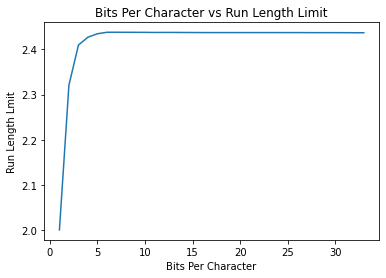

In [31]:
import matplotlib.pyplot as plt
import numpy as np 
max_len = np.linspace(1,33,33)
bpc = np.fromiter((rle_limited(genome,m) for m in max_len),float)
plt.plot(max_len,bpc)
plt.xlabel('Bits Per Character')
plt.ylabel('Run Length Lmit')
plt.title('Bits Per Character vs Run Length Limit')